# Matrix element of $\Lambda_c$ decay: Angular part
The notebook is not complete.
There is a mistake in the Wigner d-functions

In [1]:
const m1 = 0.938;   const m1sq = m1^2;
const m2 = 0.13957; const m2sq = m2^2;
const m3 = 0.49367; const m3sq = m3^2;
const m0 = 2.2845;  const m0sq = m0^2;

### Scattering angle in the isobar frame

In [2]:
λ(x,y,z) = x^2+y^2+z^2 - 2x*y - 2y*z - 2z*x
function cosθij(s,m2s,σs)
    EE4σ = (σs[1]+m2s[2]-m2s[3])*(s-σs[1]-m2s[1])
    pp4σ = sqrt(λ(σs[1],m2s[2],m2s[3])*λ(s,σs[1],m2s[1]))
    rest = σs[3]-m2s[1]-m2s[2]
    return (2σs[1]*rest-EE4σ)/pp4σ
end

cosθ23(σ1,σ2) = cosθij(m0sq, [m1sq, m2sq, m3sq], [σ1, σ2, m0sq+m1sq+m2sq+m3sq-σ1-σ2])
cosθ12(σ1,σ2) = cosθij(m0sq, [m3sq, m1sq, m2sq], [m0sq+m1sq+m2sq+m3sq-σ1-σ2, σ1, σ2])
cosθ31(σ1,σ2) = cosθij(m0sq, [m2sq, m3sq, m1sq], [σ2, m0sq+m1sq+m2sq+m3sq-σ1-σ2, σ1])

cosθ31 (generic function with 1 method)

### Extra rotation in CM-frame

In [3]:
# angle between i=1 and j=2 in CMS
function cosθhatij(s,m2s,σs)
    EE4s = (s+m2s[1]-σs[1])*(s+m2s[2]-σs[2])
    pp4s = sqrt(λ(s,m2s[1],σs[1])*λ(s,m2s[2],σs[2]))
    rest = σs[3]-m2s[1]-m2s[2]
    return (EE4s-2s*rest)/pp4s
end

cosθhat12(σ1,σ2) = cosθhatij(m0sq, [m1sq, m2sq, m3sq], [σ1, σ2, m0sq+m1sq+m2sq+m3sq-σ1-σ2])
cosθhat31(σ1,σ2) = cosθhatij(m0sq, [m3sq, m1sq, m2sq], [m0sq+m1sq+m2sq+m3sq-σ1-σ2, σ1, σ2])
cosθhat23(σ1,σ2) = cosθhatij(m0sq, [m2sq, m3sq, m1sq], [σ2, m0sq+m1sq+m2sq+m3sq-σ1-σ2, σ1])
# angles which enter D-functions
cosθhat1(p...) = cosθhat31(p...)
cosθhat2(p...) = cosθhat23(p...) # (-1)^M
cosθhat3(p...) = 1.0

cosθhat3 (generic function with 1 method)

### Wigner angle

In [93]:
function cosβ(s,m2s,σs)
    EE4m1sq = (s+m2s[1]-σs[1])*(σs[3]-m2s[1]-m2s[2])
    pp4m1sq = sqrt(λ(s,m2s[1],σs[1])*λ(m2s[1],m2s[2],σs[3]))
    rest = s+m2s[2]-σs[2]
    return (EE4m1sq-2m2s[1]*rest)/pp4m1sq
end
cosβ1(σ1,σ2) = 1.0
cosβ2(σ1,σ2) = cosβ(m0sq, [m1sq, m2sq, m3sq], [σ1, σ2, m0sq+m1sq+m2sq+m3sq-σ1-σ2])
cosβ3(σ1,σ2) = cosβ(m0sq, [m1sq, m3sq, m2sq], [σ1, m0sq+m1sq+m2sq+m3sq-σ1-σ2, σ2])

cosβ3 (generic function with 1 method)

### Angular functions

In [5]:
push!(LOAD_PATH,".")
using AngularFunctions

In [67]:
[i for i=0:0]

1-element Array{Int64,1}:
 0

In [83]:
# ls-helicity relations
function Z1jΛsl(λp,Λ,s,l,pars...)
    if s == 0
        return  sqrt((2l+1)/(2*1/2+1))*sum(
                ClGd(l,0,1/2,τ+λp,1/2,τ+λp)*
                ClGd(s,τ,1/2,λp,1/2,τ+λp)*Z1jΛsτ(λp,Λ,s,τ,pars...) for τ=-s:s)

    end
    sqrt((2l+1)/(2*1/2+1))*sum(
                ClGd(l,0,s-1/2+dS,τ+λp,1/2,τ+λp)*
                ClGd(s,τ,1/2,λp,s-1/2+dS,τ+λp)*Z1jΛsτ(λp,Λ,s,τ,pars...) for τ=-s:s, dS=0:1)
end
for k in 2:3
    @eval $(Symbol("Z"*string(k)*"jΛsl"))(λp,Λ,s,l,pars...) =
        sqrt((2l+1)/(2*1/2+1))*sum(ClGd(l,0,s,τ,1/2,τ)*$(Symbol("Z"*string(k)*"jΛsτ"))(λp,Λ,s,τ,pars...) for τ=-s:s)
end

In [84]:
Z1jΛsl(1/2,-1/2,0,0,1.3,3.2)

0.3706060307877729

In [73]:
Zchain(j,s,Λ,λs,λk,λi_λj,cosθk,cosθij) = begin
    sqrt((2s+1)*(2j+1))wignerd(j,Λ,λs-λk,cosθk)*wignerd(s,λs,λi_λj,cosθij)
end
# ZjΛsτ function
Z1jΛsτ(λp,Λ,s,τ,pars...) = Zchain(1/2,s,Λ,τ,λp, 0,cosθhat1(pars...),cosθ23(pars...))
Z2jΛsτ(λp,Λ,s,τ,pars...) = Zchain(1/2,s,Λ,τ,0,-λp,cosθhat2(pars...),cosθ31(pars...))*(Λ==1/2 ? 1.0 : -1.0)
Z3jΛsτ(λp,Λ,s,τ,pars...) = Zchain(1/2,s,Λ,τ,0, λp,cosθhat3(pars...),cosθ12(pars...))

Z3jΛsτ (generic function with 1 method)

In [146]:
Z2jΛsτ(1/2,1/2,1/2,1/2,1.3,3.3)

-0.40255490455268483

In [148]:
Z3jΛsl(1/2,1/2,1/2,0,1.3,3.3)

0.8284117862224895

In [80]:
for k in 1:3
    @eval function $(Symbol("M"*string(k)))(Λ,λp,Cksl,σ1,σ2)
        σs = [σ1, σ2, m0sq+m1sq+m2sq+m3sq-σ1-σ2]
        ZjΛsl = $(Symbol("Z"*string(k)*"jΛsl"))
        sum(R(σs[$k])*c*ZjΛsl(λp,Λ,s,l,σ1,σ2) for (R,c,s,l) in Cksl)
    end
end

In [89]:
const mKs = 0.89176; const ΓKs = 0.05;
const mΛ  = 1.5195;  const ΓΛ  = 0.0156;
const mΔ  = 1.232;   const ΓΔ = 0.112;

In [155]:
BW(σ,msq,Γ) = 1.0 / (msq-σ-1im*√msq*Γ)
######
Ks(σ) = BW(σ,mKs^2,ΓKs)
Λ(σ) = BW(σ,mΛ^2,ΓΛ)
Δ(σ) = BW(σ,mΔ^2,ΓΔ)

Csl = [
    # channel #1 pi K
    [(Ks, 3.0, 1, 0)],
    # channel #2 K p
    [(Λ, 1.0, 1/2, 0)],
    # channel #3 p pi
    [(Δ, 3.0, 3/2, 1)]
]

3-element Array{Array{Tuple{Function,Float64,Real,Int64},1},1}:
 Tuple{Function,Float64,Real,Int64}[(Ks, 3.0, 1, 0)] 
 Tuple{Function,Float64,Real,Int64}[(Λ, 1.0, 0.5, 0)]
 Tuple{Function,Float64,Real,Int64}[(Δ, 3.0, 1.5, 1)]

In [156]:
[M1(1/2,1/2,Csl[1], 1.3,3.2),
 M2(1/2,1/2,Csl[2], 1.3,3.2),
 M3(1/2,1/2,Csl[3], 1.3,3.2)]

3-element Array{Complex{Float64},1}:
  1.89238-0.167162im 
  1.57222-0.0418217im
 -8.33463+3.3417im   

In [153]:
function M(Λ,λp,Csl,pars...)
    cosβ = [cosβ1(pars...), cosβ2(pars...), cosβ3(pars...)]
    Ms = [M1, M2, M3]
    sum(
        cosβ[k] == 1.0 ? Ms[k](Λ,λp,Csl[k],pars...) :
            sum(wignerd(1/2,-1/2+dλp_prime,λp,cosβ[k])*Ms[k](Λ,-1/2+dλp_prime,Csl[k],pars...) for dλp_prime in 0:1)
        for k=1:3)
end

M (generic function with 1 method)

### Intensity

In [134]:
intens(Csl,pars...) = sum(abs2(M(-1/2+dΛ,-1/2+dλp,Csl,pars...)) for dλp in 0:1, dΛ in 0:1)

intens (generic function with 1 method)

In [158]:
Kibble(σ1,σ2) = (2σ2*(m1sq+m0sq-σ1)-(m0sq+σ2-m2sq)*(σ2+m1sq-m3sq))^2 - λ(m0sq,σ2,m2sq)*λ(σ2,m1sq,m3sq)

Kibble (generic function with 1 method)

In [130]:
using Plots

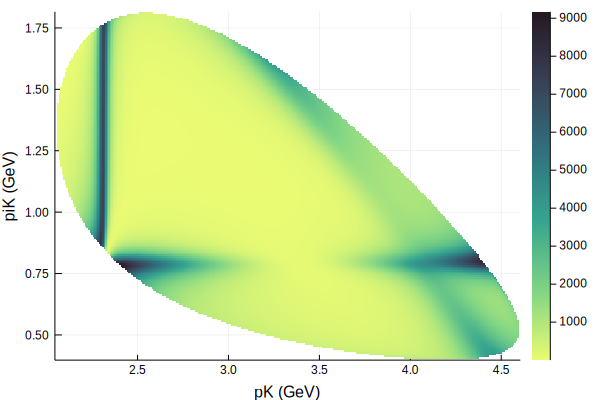

In [159]:
function plot_dalitz(Csl)
    σ2v = linspace((m3+m1)^2, (m0-m2)^2, 300)
    σ1v = linspace((m2+m3)^2, (m0-m1)^2-1e-3, 200)
    cal = [Kibble(σ1,σ2) < 0.0 ? intens(Csl,σ1,σ2) : NaN for σ1 in σ1v, σ2 in σ2v]
    heatmap(σ2v, σ1v, cal, c=:lime_grad, xlab="pK (GeV)", ylab="piK (GeV)")
end
plot_dalitz(Csl)